In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns

from matplotlib_venn import venn3, venn2
from tracking_grants.utils.helpers import load_references, load_articles, load_metrics, load_awards, load_grants, load_trials

In [4]:
# sns.set_context("notebook")

# Color palette
cm = "Paired"
cp3 = sns.color_palette(cm, 3)
cp10 = sns.color_palette(cm, 10)

# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

In [5]:
refs = load_references()
articles = load_articles()
metrics = load_metrics()
awards = load_awards()
grants = load_grants()
trials = load_trials()

# Tracking Grants

29.07.2020, ScholCommLab

## Part 0 - Goals/Overview

### What we hope this data can do (and what it cannot)

- Enhance the available data regarding these programs with other sources
- Provide an high-level overview of the outputs of each funding program
- Give a sense of future areas of exploration

### What we are not doing

- Not doing a detailed assessment of grants, papers, or programs
- Not evaluating the quality of the work, efficiency of the programs, of measuring if they are meeting their stated objectives. 
- Citations ≠ quality, Altmetrics ≠ public value, News ≠ saliency

## Part 1 - Data Gathering and Enhancement

### Overview of the data pipeline

![](tracking_grants_flowchart.png)

In [65]:
def plot_awards_pubs_over_years():
    df = articles.drop_duplicates("DOI").created.value_counts().to_frame("Publications")
    df['Awards'] = awards.award_year.value_counts()
    df.index.name = "Year"
    df = df.reset_index().melt(id_vars="Year", value_name="Count", var_name="Type")
    sns.barplot(x="Year", y="Count", hue="Type", data=df)
    plt.savefig("plot_awards_pubs_over_years.png")
    plt.close()
    
plot_awards_pubs_over_years()

### Overall descriptives

Research programs and # of deposited references: PCRP (7337), NFRP (624), TSCRP (202)
    
![plot_awards_pubs_over_years.png](plot_awards_pubs_over_years.png)

In [52]:
def venn_refs():
    all_articles = set(refs.reference_id.unique().tolist())
    articles_w_altm = set(articles.reference_id.unique().tolist())

    total = len(all_articles)

    v = venn2([all_articles, articles_w_altm],
          set_labels=('', '', ''),
          subset_label_formatter=lambda x: "{:,} ({:.1f}%)".format(x, 100*x/total));

    v.get_patch_by_id('10').set_color(cp3[0])
    v.get_patch_by_id('11').set_color(np.add(cp3[0], cp3[1])/2)
#     v.get_patch_by_id('001').set_color(np.add(cp3[0], cp3[2])/2)
#     v.get_patch_by_id('111').set_color(np.add(np.add(cp3[1], cp3[0]), cp3[2]) / 3)

    for text in v.set_labels:
        text.set_fontsize(10)
    # for text in v.subset_labels:
    #     text.set_fontsize(12)

    handles = []
    labels=["Total references", "Found in Crossref"]
    for l, c in zip(labels, [cp3[0], np.add(cp3[0], cp3[1])/2, np.add(cp3[0], cp3[2])/2]):
        handles.append(mpatches.Patch(color=c, label=l))
    plt.legend(handles=handles);
    plt.savefig("venn_refs.png")
    plt.close()
    
venn_refs()

### Coverage of references found in Crossref

8,164 references were matched to 6,923 DOIs.

![venn_refs.png](venn_refs.png)

In [30]:
def venn_metrics():
    all_articles = set(articles.DOI.unique().tolist())
    articles_w_altm = set(metrics[metrics.twitter_accounts.notna()].DOI.unique().tolist())
    articles_w_cit = set(metrics[metrics.wos_citations.notna()].DOI.unique().tolist())

    total = len(all_articles)

    v = venn3([all_articles, articles_w_altm, articles_w_cit],
          set_labels=('', '', ''),
          subset_label_formatter=lambda x: "{:,} ({:.1f}%)".format(x, 100*x/total));

    v.get_patch_by_id('100').set_color(cp3[0])
    v.get_patch_by_id('110').set_color(np.add(cp3[0], cp3[1])/2)
    v.get_patch_by_id('101').set_color(np.add(cp3[0], cp3[2])/2)
    v.get_patch_by_id('111').set_color(np.add(np.add(cp3[1], cp3[0]), cp3[2]) / 3)

    for text in v.set_labels:
        text.set_fontsize(10)
    # for text in v.subset_labels:
    #     text.set_fontsize(12)

    handles = []
    labels=["Articles found", "WoS", "Twitter"]
    for l, c in zip(labels, [cp3[0], np.add(cp3[0], cp3[1])/2, np.add(cp3[0], cp3[2])/2]):
        handles.append(mpatches.Patch(color=c, label=l))
    plt.legend(handles=handles);
    plt.savefig("venn_metrics.png")
    plt.close()
    
venn_metrics()

### Coverage of DOIs in the WoS and Twitter

![venn_metrics.png](venn_metrics.png)

### Clinical Trials

- How many articles (with DOIs) had clinical trials?
- How many grants had clinical trials?
- Distribution of phases (table?)

In [60]:
metrics[metrics.n_trials.notna()].DOI.nunique()

217

In [63]:
grants[grants.n_trials.notna()].grant_id.nunique()

165

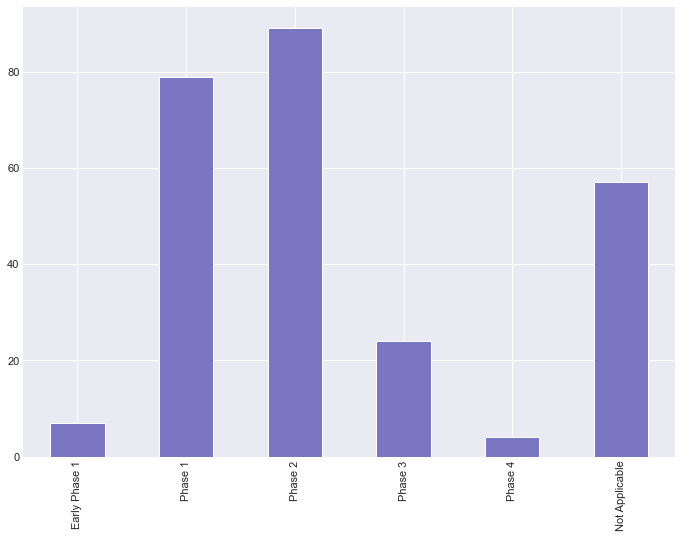

In [13]:
trials.Phase.value_counts().reindex(["Early Phase 1", "Phase 1", "Phase 2", "Phase 3", "Phase 4", "Not Applicable"]).plot(kind="bar")

## Part 2 - Data on the grant level

After collecting article-level data we can offer insights on the grant level by aggregating by the IDs.

### Slide - Overview of grants

- How many per research program?
- Average size of awards (publications, award sizes)

### Slide - Measuring grant outputs

Boxplots for various metrics: citations, twitter, news, ...

## Part 3 - Not all grants are the same

### Overview of grants
- How many per research program?
- Average size/distribution of awards
    - Number of Publications
    - Award sizes

### Award Types
- Break down # of Publications and $ by award type

## Part 4 - Not all grants are the same

### Measuring grant outputs

- Boxplots for various metrics: citations, twitter, news, ..

### Pairplot on the grant level (3x3 plots)

- Color by award type?
- Size of bubble by funding amount
- 3 plots: Citations, Twitter, News, (Clinical trials?)

### Pairplots: 

- Bubbles are grants
    - \$ vs # paper
    - \$ vs # citation
    - \$ vs # tweet 

## Part 5 - Limitations

### Data quality and completeness

- We are not fetching papers, only using data provided
- We are matching citation strings to Crossref database: there’s an error rate in this matching
- Citations from WoS only count citing papers from other WoS papers
- Altmetric and Unpaywall are also known to have some errors (as with any database drawn from searching the Web).